Reference links :


1.   https://github.com/NVlabs/CircuitOps/tree/62638d0e8f7741a820002dfc462cc1bca42de6e9
2.   https://github.com/bingyuew/OpenROAD/tree/cde1403ce8974ec0ff95cba79e2142b94ee34836

Data Link :

https://github.com/ASU-VDA-Lab/2024_ICCAD_Contest_Gate_Sizing_Benchmark



In [1]:
!pip install gym

In [2]:
import numpy as np
import pandas as pd
import gym
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from collections import deque
import random

In [4]:
!git clone https://github.com/ASU-VDA-Lab/2024_ICCAD_Contest_Gate_Sizing_Benchmark

Cloning into '2024_ICCAD_Contest_Gate_Sizing_Benchmark'...
remote: Enumerating objects: 915, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 915 (delta 65), reused 113 (delta 47), pack-reused 772 (from 1)
Receiving objects: 100% (915/915), 767.78 MiB | 1.94 MiB/s, done.
Resolving deltas: 100% (416/416), done.
Updating files: 100% (106/106), done.


In [6]:
!cd 2024_ICCAD_Contest_Gate_Sizing_Benchmark/design/

# EDA

In [7]:
!apt-get install tree
!tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
.
├── 2024_ICCAD_Contest_Gate_Sizing_Benchmark
│   ├── CircuitOps
│   ├── Dockerfile
│   ├── Dockerfile_dgl_cuda
│   ├── IR_Tables
│   │   ├── NV_NVDLA_partition_m
│   │   │   ├── cell_cell_edge.csv.bz2
│   │   │   ├── cell_net_edge.csv.bz2
│   │   │   ├── cell_pin_edge.csv.bz2
│   │   │   ├── cell_properties.csv.bz2
│   │   │   ├── libcell_properties.csv.bz2
│   │   │   ├── net_pin_edge.csv.bz2
│   │   │   ├── net_properties.csv.bz2
│   │   │   ├── pin_pin_edge.csv.bz2
│   │   │   └── pin_properties.csv.bz2
│   │   ├── NV_NVDLA_partition_p
│   │   │   ├── cell_cell_edge.csv.bz2
│   │   │   ├── cell_net_edge.csv.bz2
│   │   │   ├── cell_pin_edge.csv.bz2
│   │   │   ├── cell_properties.csv.bz2
│   │   │   ├── libcell_properties.csv.bz2
│   │   │   ├── net_pin_edge.csv.bz2
│   │   │  

In [12]:
!cd ~

In [13]:
import bz2
import os

def decompress_bz2_file(filepath, output_dir):
    new_filepath = os.path.join(output_dir, os.path.basename(filepath).replace('.bz2', ''))
    with bz2.BZ2File(filepath, 'rb') as file:
        with open(new_filepath, 'wb') as new_file:
            new_file.write(file.read())
    return new_filepath

def data_loader(base_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    for subdir, _, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.bz2'):
                filepath = os.path.join(subdir, file)
                decompressed_file = decompress_bz2_file(filepath, output_dir)

                if decompressed_file.endswith('.csv'):
                    print(f"Decompressed and stored CSV file: {decompressed_file}")

data_directory = "2024_ICCAD_Contest_Gate_Sizing_Benchmark/"
output_directory = "decompressed_csv_files/"

data_loader(data_directory, output_directory)

Decompressed and stored CSV file: decompressed_csv_files/cell_properties.csv
Decompressed and stored CSV file: decompressed_csv_files/libcell_properties.csv
Decompressed and stored CSV file: decompressed_csv_files/net_properties.csv
Decompressed and stored CSV file: decompressed_csv_files/pin_pin_edge.csv
Decompressed and stored CSV file: decompressed_csv_files/pin_properties.csv
Decompressed and stored CSV file: decompressed_csv_files/cell_cell_edge.csv
Decompressed and stored CSV file: decompressed_csv_files/net_pin_edge.csv
Decompressed and stored CSV file: decompressed_csv_files/cell_net_edge.csv
Decompressed and stored CSV file: decompressed_csv_files/cell_pin_edge.csv
Decompressed and stored CSV file: decompressed_csv_files/cell_properties.csv
Decompressed and stored CSV file: decompressed_csv_files/libcell_properties.csv
Decompressed and stored CSV file: decompressed_csv_files/net_properties.csv
Decompressed and stored CSV file: decompressed_csv_files/pin_pin_edge.csv
Decompress

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


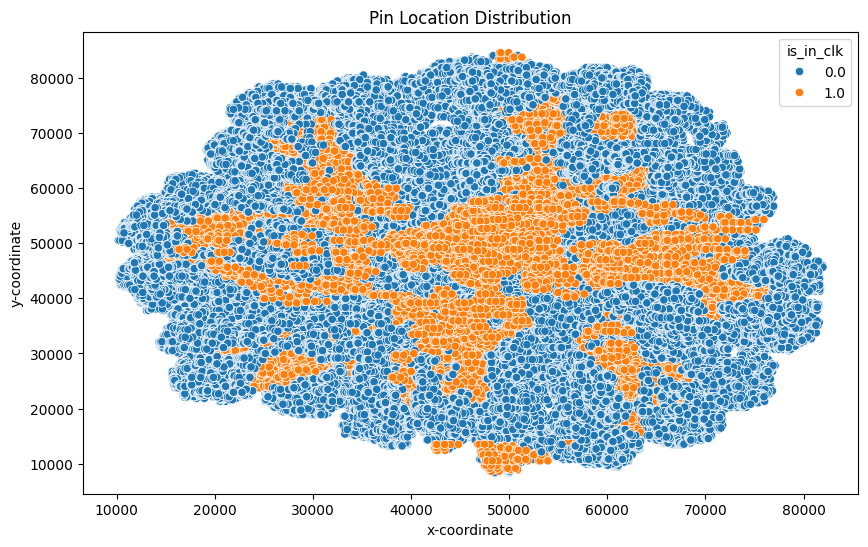

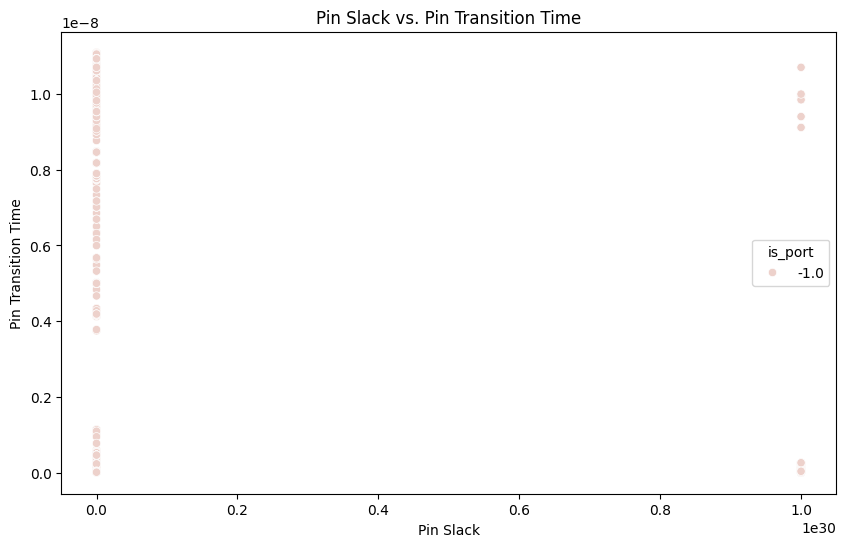

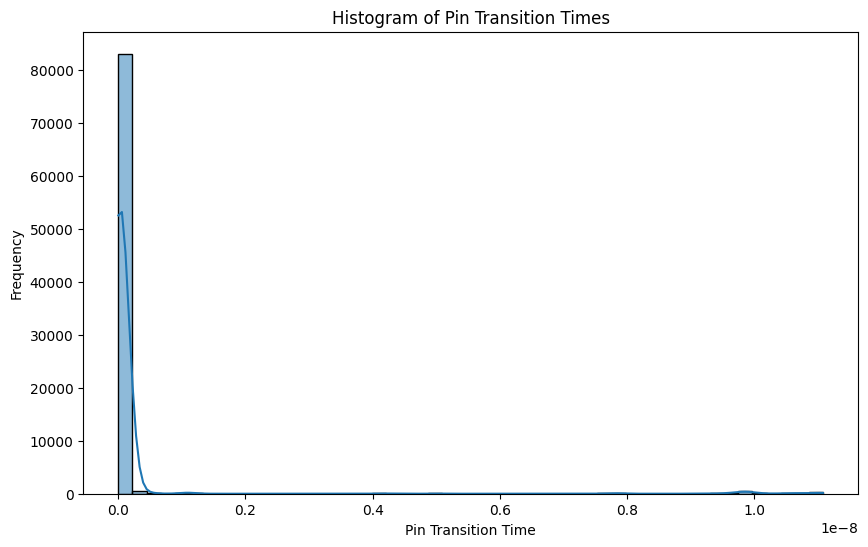

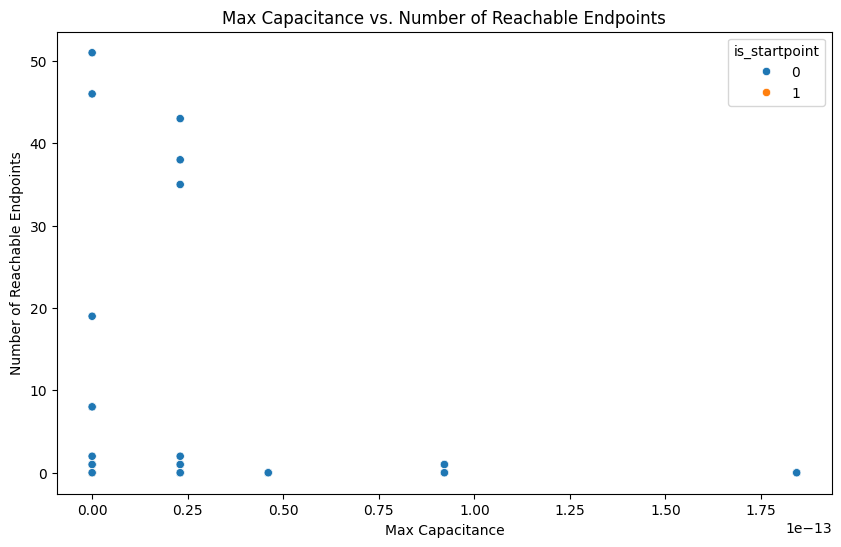

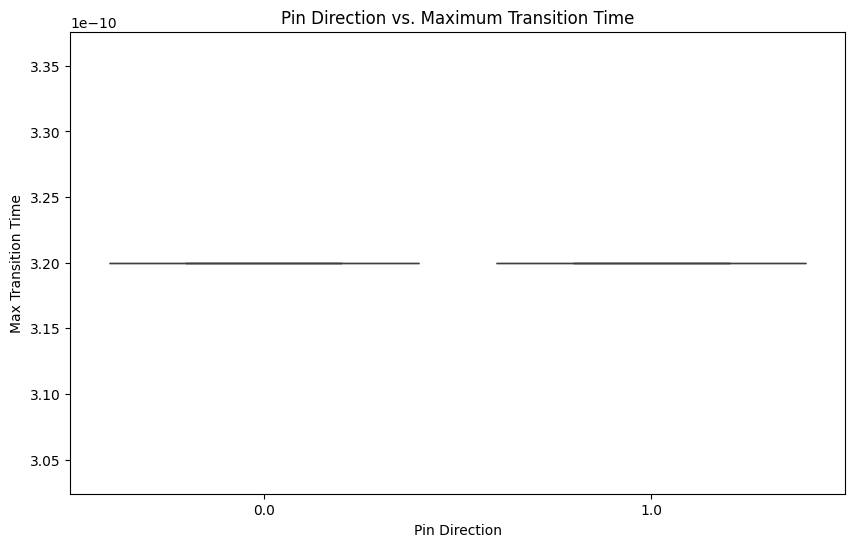

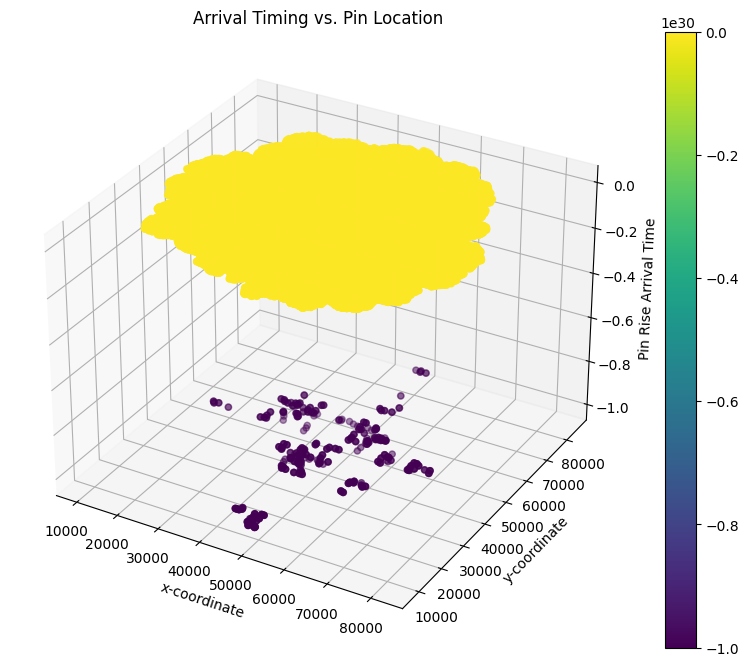

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Plot 1: Pin Location Distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', hue='is_in_clk', data=value)
plt.title('Pin Location Distribution')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

# Plot 2: Pin Slack vs. Pin Transition Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pin_slack', y='pin_tran', hue='is_port', data=value)
plt.title('Pin Slack vs. Pin Transition Time')
plt.xlabel('Pin Slack')
plt.ylabel('Pin Transition Time')
plt.show()

# Plot 3: Histogram of Pin Transition Times
plt.figure(figsize=(10, 6))
sns.histplot(value['pin_tran'], bins=50, kde=True)
plt.title('Histogram of Pin Transition Times')
plt.xlabel('Pin Transition Time')
plt.ylabel('Frequency')
plt.show()

# Plot 4: Maximum Capacitance vs. Number of Reachable Endpoints
plt.figure(figsize=(10, 6))
sns.scatterplot(x='maxcap', y='num_reachable_endpoint', hue='is_startpoint', data=value)
plt.title('Max Capacitance vs. Number of Reachable Endpoints')
plt.xlabel('Max Capacitance')
plt.ylabel('Number of Reachable Endpoints')
plt.show()

# Plot 5: Pin Direction vs. Maximum Transition Time
plt.figure(figsize=(10, 6))
sns.boxplot(x='dir', y='maxtran', data=value)
plt.title('Pin Direction vs. Maximum Transition Time')
plt.xlabel('Pin Direction')
plt.ylabel('Max Transition Time')
plt.show()

# Plot 6: Timing Arrival vs. Pin Location
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(value['x'], value['y'], value['pin_rise_arr'], c=value['pin_rise_arr'], cmap='viridis')
ax.set_title('Arrival Timing vs. Pin Location')
ax.set_xlabel('x-coordinate')
ax.set_ylabel('y-coordinate')
ax.set_zlabel('Pin Rise Arrival Time')
fig.colorbar(sc)
plt.show()

In [14]:
import pandas as pd
import os

def explore_csv_files(directory):
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)

        print(f"Exploring file: {csv_file}")
        print(f"Number of rows: {len(df)}")
        print(f"Number of columns: {len(df.columns)}")
        print(df.columns.tolist())
        print(df.dtypes)

        print("\n" + "="*40 + "\n")

output_directory = "decompressed_csv_files/"

explore_csv_files(output_directory)

Exploring file: cell_pin_edge.csv
Number of rows: 684220
Number of columns: 4
['src', 'tar', 'src_type', 'tar_type']
src         object
tar         object
src_type    object
tar_type    object
dtype: object


Exploring file: cell_cell_edge.csv
Number of rows: 481966
Number of columns: 4
['src', 'tar', 'src_type', 'tar_type']
src         object
tar         object
src_type    object
tar_type    object
dtype: object


Exploring file: pin_properties.csv
Number of rows: 684220
Number of columns: 18
['pin_name', 'x', 'y', 'is_in_clk', 'is_port', 'is_startpoint', 'is_endpoint', 'dir', 'maxcap', 'maxtran', 'num_reachable_endpoint', 'cell_name', 'net_name', 'pin_tran', 'pin_slack', 'pin_rise_arr', 'pin_fall_arr', 'input_pin_cap']
pin_name                   object
x                         float64
y                         float64
is_in_clk                 float64
is_port                   float64
is_startpoint               int64
is_endpoint                 int64
dir                       float

In [15]:
cell_properties_df = pd.read_csv('decompressed_csv_files/cell_properties.csv')
libcell_properties_df = pd.read_csv('decompressed_csv_files/libcell_properties.csv')
pin_properties_df = pd.read_csv('decompressed_csv_files/pin_properties.csv')
net_properties_df = pd.read_csv('decompressed_csv_files/net_properties.csv')
cell_net_edge_df = pd.read_csv('decompressed_csv_files/cell_net_edge.csv')
pin_pin_edge_df = pd.read_csv('decompressed_csv_files/pin_pin_edge.csv')
cell_cell_edge_df = pd.read_csv('decompressed_csv_files/cell_cell_edge.csv')
net_pin_edge_df = pd.read_csv('decompressed_csv_files/net_pin_edge.csv')
cell_pin_edge_df = pd.read_csv('decompressed_csv_files/cell_pin_edge.csv')

In [17]:
cell_properties_df.head()

,cell_name,is_seq,is_macro,is_in_clk,x0,y0,x1,y1,is_buf,is_inv,libcell_name,cell_static_power,cell_dynamic_power
0,ADD_TC_OP28469_g11971,0.0,0.0,0.0,321876.0,118674.0,322200.0,118944.0,0.0,0.0,A2O1A1Ixp33_ASAP7_75t_R,5.182290e-11,0.0
1,ADD_TC_OP28469_g15613,0.0,0.0,0.0,301032.0,124884.0,301248.0,125154.0,0.0,0.0,NOR2xp33_ASAP7_75t_R,1.286690e-11,0.0
2,ADD_TC_OP28469_g15614,0.0,0.0,0.0,302058.0,127044.0,302274.0,127314.0,0.0,0.0,NOR2xp33_ASAP7_75t_R,1.286690e-11,0.0
3,ADD_TC_OP28469_g15616,0.0,0.0,0.0,301734.0,124884.0,301950.0,125154.0,0.0,0.0,NAND2xp33_ASAP7_75t_R,2.642080e-11,0.0
4,ADD_TC_OP28469_g17715_dup1,0.0,0.0,0.0,310590.0,112194.0,310860.0,112464.0,0.0,0.0,OAI21xp33_ASAP7_75t_R,2.528240e-11,0.0


In [18]:
libcell_properties_df.head()

,libcell_name,func_id,libcell_area,worst_input_cap,libcell_leakage,fo4_delay,fix_load_delay
0,sram_asap7_32x256_1rw,0,280896000,2.500000e-14,1.289000e-04,2.180000e-10,2.180000e-10
1,sram_asap7_64x256_1rw,0,561792000,2.500000e-14,1.289000e-04,2.180000e-10,2.180000e-10
2,A2O1A1Ixp33_ASAP7_75t_R,1,87480,6.317370e-16,0.000000e+00,2.065041e-11,2.265736e-11
3,A2O1A1O1Ixp25_ASAP7_75t_R,2,131220,6.760200e-16,0.000000e+00,2.697289e-11,3.071793e-11
4,AND2x2_ASAP7_75t_R,3,87480,5.657080e-16,1.746290e-10,1.682281e-11,1.811695e-11


In [19]:
pin_properties_df.head()

,pin_name,x,y,is_in_clk,is_port,is_startpoint,is_endpoint,dir,maxcap,maxtran,num_reachable_endpoint,cell_name,net_name,pin_tran,pin_slack,pin_rise_arr,pin_fall_arr,input_pin_cap
0,ADD_TC_OP28469_g11971/A1,321957.0,118809.0,0.0,-1.0,0,0,0.0,0.000000e+00,3.200000e-10,0,ADD_TC_OP28469_g11971,n_1267477,4.679370e-11,-2.213012e-10,2.728626e-09,2.724563e-09,5.961020e-16
1,ADD_TC_OP28469_g11971/A2,322011.0,118809.0,0.0,-1.0,0,0,0.0,0.000000e+00,3.200000e-10,0,ADD_TC_OP28469_g11971,n_1267478,6.108794e-11,-3.446323e-10,2.853551e-09,2.825233e-09,5.981080e-16
2,ADD_TC_OP28469_g11971/B,322065.0,118809.0,0.0,-1.0,0,0,0.0,0.000000e+00,3.200000e-10,0,ADD_TC_OP28469_g11971,n_1267482,3.775199e-11,-1.928435e-11,2.534807e-09,2.527498e-09,6.317370e-16
3,ADD_TC_OP28469_g11971/C,322119.0,118809.0,0.0,-1.0,0,0,0.0,0.000000e+00,3.200000e-10,0,ADD_TC_OP28469_g11971,n_1267486,2.412713e-11,-2.088809e-10,2.717822e-09,2.731511e-09,6.050140e-16
4,ADD_TC_OP28469_g11971/Y,322156.0,118809.0,0.0,-1.0,0,0,1.0,2.304000e-14,3.200000e-10,0,ADD_TC_OP28469_g11971,n_1267487,3.203707e-11,-3.446323e-10,2.850541e-09,2.876650e-09,-1.000000e+00


In [20]:
net_properties_df.head()

,net_name,net_route_length,net_steiner_length,fanout,total_cap,net_cap,net_coupling,net_res
0,axi_mst_req_o[0],110160.0,-1,2.0,1.477776e-14,1.391520e-14,-1,3758.533618
1,axi_mst_req_o[100],163080.0,-1,0.0,2.029928e-14,2.029928e-14,-1,5564.103689
2,axi_mst_req_o[101],133920.0,-1,0.0,1.713965e-14,1.713965e-14,-1,4569.197731
3,axi_mst_req_o[102],159300.0,-1,0.0,2.065210e-14,2.065210e-14,-1,5435.134398
4,axi_mst_req_o[103],123660.0,-1,0.0,1.602657e-14,1.602657e-14,-1,4219.138228


In [21]:
cell_net_edge_df.head()

,src,tar,src_type,tar_type
0,n_1267477,ADD_TC_OP28469_g11971,net,cell
1,n_1267478,ADD_TC_OP28469_g11971,net,cell
2,n_1267482,ADD_TC_OP28469_g11971,net,cell
3,n_1267486,ADD_TC_OP28469_g11971,net,cell
4,ADD_TC_OP28469_g11971,n_1267487,cell,net


In [22]:
cell_pin_edge_df.head()

,src,tar,src_type,tar_type
0,ADD_TC_OP28469_g11971/A1,ADD_TC_OP28469_g11971,pin,cell
1,ADD_TC_OP28469_g11971/A2,ADD_TC_OP28469_g11971,pin,cell
2,ADD_TC_OP28469_g11971/B,ADD_TC_OP28469_g11971,pin,cell
3,ADD_TC_OP28469_g11971/C,ADD_TC_OP28469_g11971,pin,cell
4,ADD_TC_OP28469_g11971,ADD_TC_OP28469_g11971/Y,cell,pin


In [23]:
merged_df = pd.merge(cell_properties_df, libcell_properties_df, on='libcell_name', how='left')

merged_df = pd.merge(merged_df, pin_properties_df, on='cell_name', how='left')

merged_df = pd.merge(merged_df, net_properties_df, on='net_name', how='left')

merged_df = pd.merge(merged_df, cell_net_edge_df, left_on=['cell_name', 'net_name'], right_on=['src', 'tar'], how='left', suffixes=('', '_cell_net'))

merged_df = pd.merge(merged_df, pin_pin_edge_df, left_on=['pin_name'], right_on=['src'], how='left', suffixes=('', '_pin_pin'))

merged_df = pd.merge(merged_df, cell_cell_edge_df, left_on=['cell_name'], right_on=['src'], how='left', suffixes=('', '_cell_cell'))

merged_df = pd.merge(merged_df, net_pin_edge_df, left_on=['net_name', 'pin_name'], right_on=['src', 'tar'], how='left', suffixes=('', '_net_pin'))

merged_df = pd.merge(merged_df, cell_pin_edge_df, left_on=['cell_name', 'pin_name'], right_on=['src', 'tar'], how='left', suffixes=('', '_cell_pin'))

merged_df = merged_df.dropna(axis=1, how='all')
merged_df = merged_df.fillna(0)

merged_df.to_csv('merged_data.csv', index=False)
print(merged_df.info())
print(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7470456 entries, 0 to 7470455
Data columns (total 65 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   cell_name               object 
 1   is_seq                  float64
 2   is_macro                float64
 3   is_in_clk_x             float64
 4   x0                      float64
 5   y0                      float64
 6   x1                      float64
 7   y1                      float64
 8   is_buf                  float64
 9   is_inv                  float64
 10  libcell_name            object 
 11  cell_static_power       float64
 12  cell_dynamic_power      float64
 13  func_id                 int64  
 14  libcell_area            int64  
 15  worst_input_cap         float64
 16  libcell_leakage         float64
 17  fo4_delay               float64
 18  fix_load_delay          float64
 19  pin_name                object 
 20  x                       float64
 21  y                       float64

In [24]:
merged_df

,cell_name,is_seq,is_macro,is_in_clk_x,x0,y0,x1,y1,is_buf,is_inv,...,src_type_cell_cell,tar_type_cell_cell,src_net_pin,tar_net_pin,src_type_net_pin,tar_type_net_pin,src_cell_pin,tar_cell_pin,src_type_cell_pin,tar_type_cell_pin
0,ADD_TC_OP28469_g11971,0.0,0.0,0.0,321876.0,118674.0,322200.0,118944.0,0.0,0.0,...,cell,cell,n_1267477,ADD_TC_OP28469_g11971/A1,net,pin,0,0,0,0
1,ADD_TC_OP28469_g11971,0.0,0.0,0.0,321876.0,118674.0,322200.0,118944.0,0.0,0.0,...,cell,cell,n_1267478,ADD_TC_OP28469_g11971/A2,net,pin,0,0,0,0
2,ADD_TC_OP28469_g11971,0.0,0.0,0.0,321876.0,118674.0,322200.0,118944.0,0.0,0.0,...,cell,cell,n_1267482,ADD_TC_OP28469_g11971/B,net,pin,0,0,0,0
3,ADD_TC_OP28469_g11971,0.0,0.0,0.0,321876.0,118674.0,322200.0,118944.0,0.0,0.0,...,cell,cell,n_1267486,ADD_TC_OP28469_g11971/C,net,pin,0,0,0,0
4,ADD_TC_OP28469_g11971,0.0,0.0,0.0,321876.0,118674.0,322200.0,118944.0,0.0,0.0,...,cell,cell,0,0,0,0,ADD_TC_OP28469_g11971,ADD_TC_OP28469_g11971/Y,cell,pin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7470451,i_tile_i_snitch_demux_data_i_stream_arbiter_re...,1.0,0.0,1.0,234072.0,211554.0,235476.0,211824.0,0.0,0.0,...,cell,cell,0,0,0,0,i_tile_i_snitch_demux_data_i_stream_arbiter_re...,i_tile_i_snitch_demux_data_i_stream_arbiter_re...,cell,pin
7470452,i_tile_i_snitch_demux_data_i_stream_arbiter_re...,1.0,0.0,1.0,234072.0,211554.0,235476.0,211824.0,0.0,0.0,...,cell,cell,0,0,0,0,i_tile_i_snitch_demux_data_i_stream_arbiter_re...,i_tile_i_snitch_demux_data_i_stream_arbiter_re...,cell,pin
7470453,i_tile_i_snitch_demux_data_i_stream_arbiter_re...,1.0,0.0,1.0,234072.0,211554.0,235476.0,211824.0,0.0,0.0,...,cell,cell,0,0,0,0,i_tile_i_snitch_demux_data_i_stream_arbiter_re...,i_tile_i_snitch_demux_data_i_stream_arbiter_re...,cell,pin
7470454,i_tile_i_snitch_demux_data_i_stream_arbiter_re...,1.0,0.0,1.0,234072.0,211554.0,235476.0,211824.0,0.0,0.0,...,cell,cell,FE_OFN1456948_FE_DBTN9959_rst_ni,i_tile_i_snitch_demux_data_i_stream_arbiter_re...,net,pin,0,0,0,0


In [25]:
import pandas as pd

file_path = 'merged_data.csv'  
merged_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to get an overview
print("First few rows of the DataFrame:")
print(merged_df.head())

# Check for missing values in each column
print("\nMissing values in each column:")
print(merged_df.isnull().sum())

# Calculate the percentage of missing values in each column
missing_percentage = (merged_df.isnull().sum() / len(merged_df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)

# Display columns that have a high percentage of NaN values (e.g., > 50%)
high_nan_columns = missing_percentage[missing_percentage > 50].index.tolist()
print(f"\nColumns with more than 50% NaN values: {high_nan_columns}")

# Optionally, save the summary to a CSV file for review
missing_summary = pd.DataFrame({
    'Column': merged_df.columns,
    'Missing Values': merged_df.isnull().sum(),
    'Missing Percentage': missing_percentage
})

/tmp/ipykernel_3724229/3762154465.py:4: DtypeWarning: Columns (57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv(file_path)


First few rows of the DataFrame:
               cell_name  is_seq  is_macro  is_in_clk_x        x0        y0  \
0  ADD_TC_OP28469_g11971     0.0       0.0          0.0  321876.0  118674.0   
1  ADD_TC_OP28469_g11971     0.0       0.0          0.0  321876.0  118674.0   
2  ADD_TC_OP28469_g11971     0.0       0.0          0.0  321876.0  118674.0   
3  ADD_TC_OP28469_g11971     0.0       0.0          0.0  321876.0  118674.0   
4  ADD_TC_OP28469_g11971     0.0       0.0          0.0  321876.0  118674.0   

         x1        y1  is_buf  is_inv  ... src_type_cell_cell  \
0  322200.0  118944.0     0.0     0.0  ...               cell   
1  322200.0  118944.0     0.0     0.0  ...               cell   
2  322200.0  118944.0     0.0     0.0  ...               cell   
3  322200.0  118944.0     0.0     0.0  ...               cell   
4  322200.0  118944.0     0.0     0.0  ...               cell   

   tar_type_cell_cell  src_net_pin               tar_net_pin  \
0                cell    n_1267477  A

In [26]:
missing_summary

,Column,Missing Values,Missing Percentage
cell_name,cell_name,0,0.0
is_seq,is_seq,0,0.0
is_macro,is_macro,0,0.0
is_in_clk_x,is_in_clk_x,0,0.0
x0,x0,0,0.0
...,...,...,...
tar_type_net_pin,tar_type_net_pin,0,0.0
src_cell_pin,src_cell_pin,0,0.0
tar_cell_pin,tar_cell_pin,0,0.0
src_type_cell_pin,src_type_cell_pin,0,0.0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=missing_summary)

https://docs.google.com/spreadsheets/d/1cfJ0azxAeaYboeksroJYuwmmX5O2Z0LMSd5wf7lNL6o#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:226: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  worksheet.update('', data)


In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
merged_df[numeric_cols] = imputer.fit_transform(merged_df[numeric_cols])

categorical_cols = ['src', 'tar', 'src_type', 'tar_type', 'src_pin_pin', 'tar_pin_pin',
                    'src_type_pin_pin', 'tar_type_pin_pin', 'src_cell_cell', 'tar_cell_cell',
                    'src_type_cell_cell', 'tar_type_cell_cell', 'src_net_pin', 'tar_net_pin',
                    'src_type_net_pin', 'tar_type_net_pin', 'src_cell_pin', 'tar_cell_pin',
                    'src_type_cell_pin', 'tar_type_cell_pin']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col].astype(str))
    label_encoders[col] = le


merged_df['tran_slack_interaction'] = merged_df['pin_tran'] * merged_df['pin_slack']

cell_pin_agg = merged_df.groupby('cell_name')['pin_tran'].mean().reset_index()
cell_pin_agg.rename(columns={'pin_tran': 'mean_pin_tran_per_cell'}, inplace=True)

merged_df = pd.merge(merged_df, cell_pin_agg, on='cell_name', how='left')

In [29]:
!pip install stable_baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 743.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.0 MB/s eta 0:00:00a 0:00:01


In [31]:
import gym
print(gym.envs.registry.all())

ValuesView(├──CartPole: [ v0, v1 ]
├──MountainCar: [ v0 ]
├──MountainCarContinuous: [ v0 ]
├──Pendulum: [ v1 ]
├──Acrobot: [ v1 ]
├──LunarLander: [ v2 ]
├──LunarLanderContinuous: [ v2 ]
├──BipedalWalker: [ v3 ]
├──BipedalWalkerHardcore: [ v3 ]
├──CarRacing: [ v1 ]
├──Blackjack: [ v1 ]
├──FrozenLake: [ v1 ]
├──FrozenLake8x8: [ v1 ]
├──CliffWalking: [ v0 ]
├──Taxi: [ v3 ]
├──Reacher: [ v2 ]
├──Pusher: [ v2 ]
├──InvertedPendulum: [ v2 ]
├──InvertedDoublePendulum: [ v2 ]
├──HalfCheetah: [ v2, v3 ]
├──Hopper: [ v2, v3 ]
├──Swimmer: [ v2, v3 ]
├──Walker2d: [ v2, v3 ]
├──Ant: [ v2, v3 ]
├──Humanoid: [ v2, v3 ]
└──HumanoidStandup: [ v2 ]
)


In [37]:
!mkdir custom_env
!cd custom_env
!mkdir lgo
!touch lgo/__init__.py lgo/lgo_env.py

In [50]:
import gym
import lgo  # This will automatically register the environment

# Create the environment
env = gym.make('LGO-v0')

# Run a simple loop
obs = env.reset()
for _ in range(10):
    action = env.action_space.sample()  # Take a random action
    obs, reward, done, info = env.step(action)
    env.render()  # Render the state
    if done:
        obs = env.reset()

env.close()


TypeError: 'module' object is not callable

In [45]:
from gym.envs.registration import register

register(
    id='LGO-v1',  # ID for your environment
    entry_point='lgo:lgo_env',  # Path to your environment class
)

In [30]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

# Create or load the environment
env = make_vec_env('LGO-v0', n_envs=1)

# Define PPO model
model_ppo = PPO('MlpPolicy', env, verbose=1)

# Train the PPO model
model_ppo.learn(total_timesteps=10000)

# Save the model
model_ppo.save("ppo_model")

# Evaluate the model
obs = env.reset()
for _ in range(1000):
    action, _states = model_ppo.predict(obs, deterministic=True)
    obs, rewards, dones, info = env.step(action)
    env.render()

NameNotFound: Environment `LGO` doesn't exist.